In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 61.1MB/s]



0: 544x640 49 cars, 1 truck, 6 traffic lights, 425.0ms
Speed: 33.1ms preprocess, 425.0ms inference, 38.3ms postprocess per image at shape (1, 3, 544, 640)


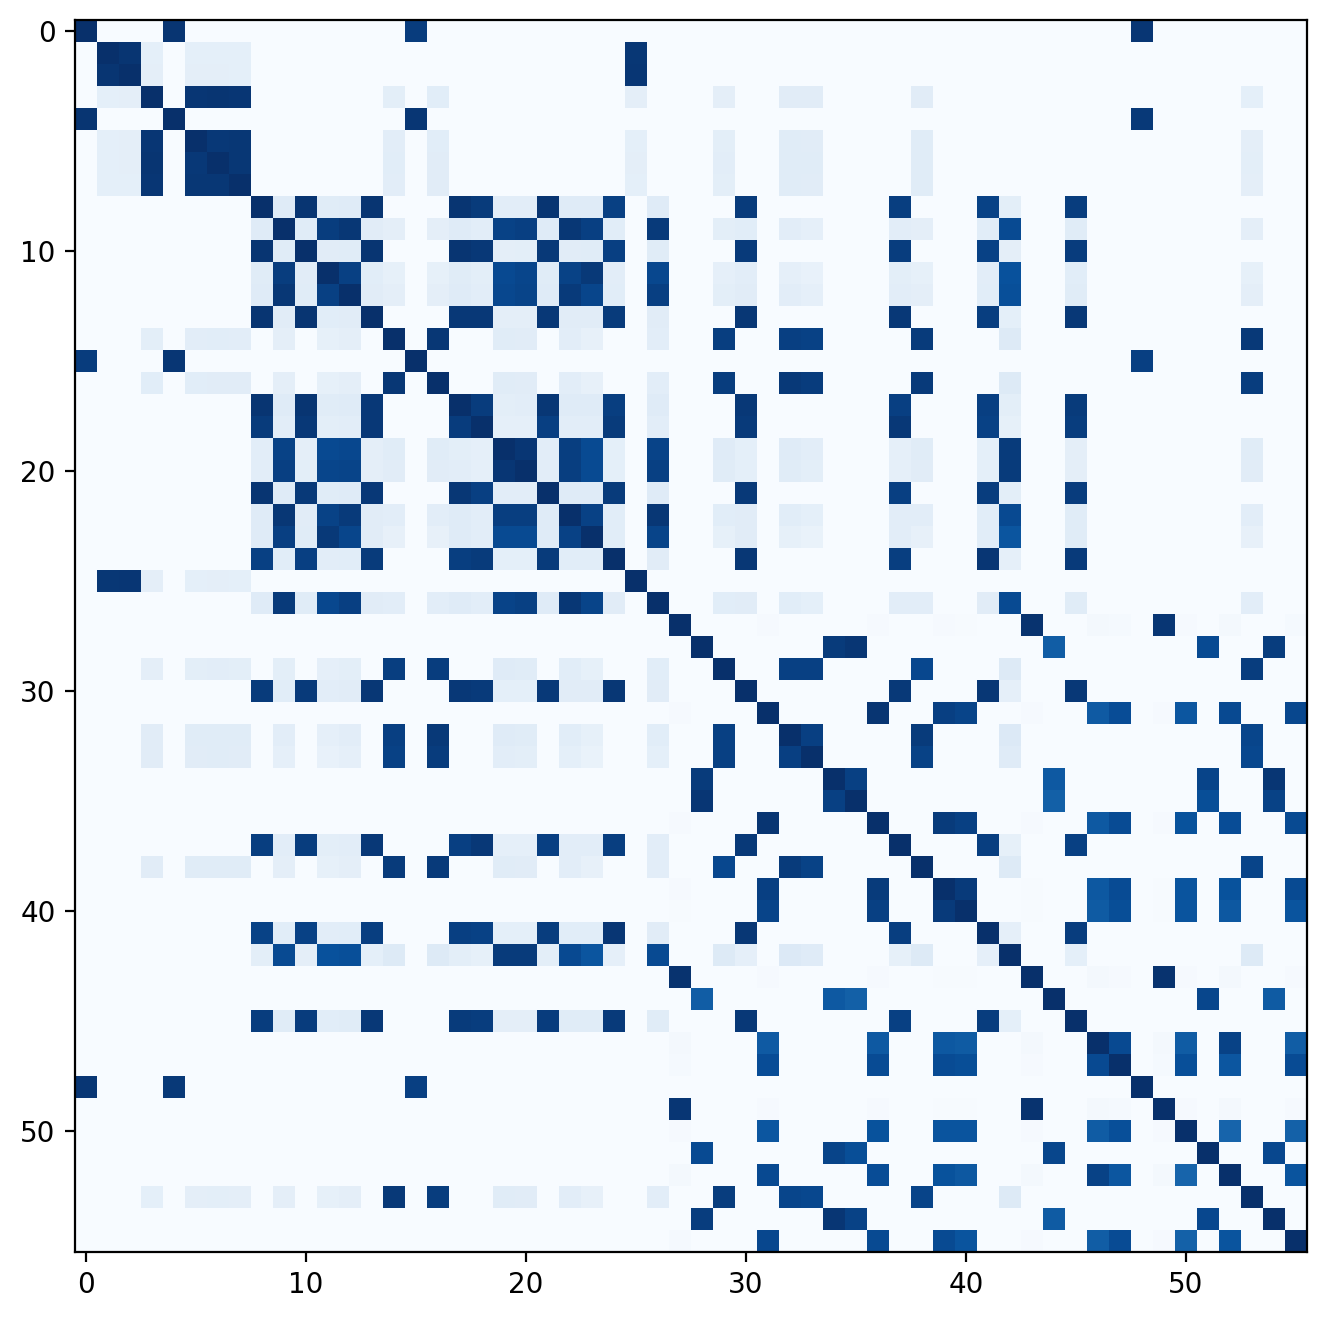

In [2]:
from PIL import Image
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt

img = Image.open("bus.jpg")
model = YOLO("yolo11n.pt")
pred = model.predict(img, iou=0.98)

bboxes = pred[0].boxes.xyxy
n_bboxes = len(bboxes)

bboxes_row = bboxes.reshape(1, n_bboxes, -1)
bboxes_col = bboxes.reshape(n_bboxes, 1, -1)

# Union = (1, 56) + (56, 1) + (56, 56)의 연산
area_row = (bboxes_row[..., 2] - bboxes_row[..., 0]) * (bboxes_row[..., 3] - bboxes_row[..., 1])
area_col = (bboxes_col[..., 2] - bboxes_col[..., 0]) * (bboxes_col[..., 3] - bboxes_col[..., 1])

# (56, 56) 크기 벡터 생성
tl_x = torch.maximum(bboxes_row[..., 0], bboxes_col[..., 0])
tl_y = torch.maximum(bboxes_row[..., 1], bboxes_col[..., 1])
br_x = torch.minimum(bboxes_row[..., 2], bboxes_col[..., 2])
br_y = torch.minimum(bboxes_row[..., 3], bboxes_col[..., 3])

intersection = (br_x - tl_x).clamp(0) * (br_y - tl_y).clamp(0)
union = area_row + area_col - intersection
iou = intersection / union

fig, ax = plt.subplots(dpi=200, figsize=(8, 8))
ax.imshow(iou, cmap="Blues")
plt.show()